## Project - Iris Dataset

### Objective

The primary objective of this project is to accurately predict the class of iris plant based on a popular and extensively researched dataset that has been widely referenced in the field of pattern recognition. The dataset consists of 150 instances divided into three classes of 50 instances each, with each class representing a different type of iris plant. While one class is linearly separable from the other two, the remaining two classes are not linearly separable from each other.

The project comprises a sequence of essential procedures that involve the following steps:

-Conducting Exploratory Data Analysis (EDA) and exploring the features using histograms.

-Encoding the target variable by converting it to a numeric type.

-Conducting experiments using two different ratios of training, validation, and test data, i.e., 60-20-20 and 80-10-10.

-Implementing KFold Cross Validation to optimize model performance.

-Implementing Grid Search to determine the optimal hyperparameters 

-Analyzing the results obtained from the Validation set and test set.

-Comparing the performance of different models, utilizing precision, recall, accuracy, and latency as evaluation metrics.

In [1]:
#Importing data and libraries
import joblib
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

iris = pd.read_csv('iris.csv')

In [2]:
# After importing data and libraries importing profiling and dtale

In [3]:
#!pip install pandas-profiling
from pandas_profiling import ProfileReport

In [4]:
#!pip install dtale
import dtale

In [5]:
#Printing the variables
#We have five features of Iris plant namely PetalLengthCm, PetalWidthCm, SepalLengthCm, SepalLengthCm and Variety
iris_dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
profile=ProfileReport(iris_dataset, title='Pandas Profiling Report',explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
dtale.show(iris_dataset)

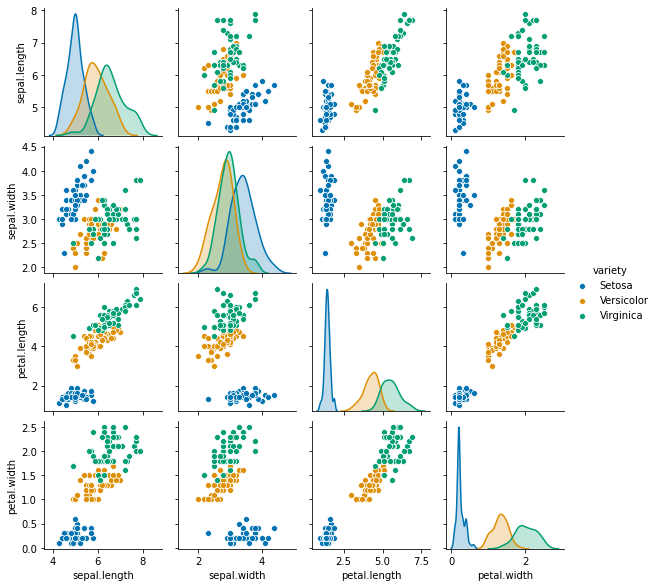

In [8]:
#Plotting to see the lengths; using pairplot.
#We can say that with SepalLength, PetalLength also increase.
#We can observe that for Setosa's maximum value of SepalLength is less than 6 cm. For Versicolor its less than 7cm.
#Virginica's SepalLength mostly tends to be larger. 
#Also, SepalWidth for Setosa's varies much with SepalLength than other twos.
sns.pairplot(iris_dataset, hue="variety", height = 2, palette = 'colorblind');

In [9]:
# Splitting into 60-20-20
features = iris_dataset.drop('variety', axis=1)
labels = iris_dataset['variety']

X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test_60, X_val_60, y_test_60, y_val_60 = train_test_split(X_test_60, y_test_60, test_size=0.5, random_state=42)

In [10]:
# Splitting it into 80-10-10
features = iris_dataset.drop('variety', axis=1)
labels = iris_dataset['variety']

X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test_80, X_val_80, y_test_80, y_val_80 = train_test_split(X_test_80, y_test_80, test_size=0.5, random_state=42)

In [11]:
# Hyperparameter tuning
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [12]:
lr = LogisticRegression(solver='liblinear')
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv_lr_60 = GridSearchCV(lr, parameters, cv=5)
cv_lr_60.fit(X_train_60, y_train_60)

print_results(cv_lr_60)

BEST PARAMS: {'C': 10}

0.356 (+/-0.054) for {'C': 0.001}
0.656 (+/-0.044) for {'C': 0.01}
0.756 (+/-0.113) for {'C': 0.1}
0.944 (+/-0.099) for {'C': 1}
0.956 (+/-0.083) for {'C': 10}
0.944 (+/-0.172) for {'C': 100}
0.933 (+/-0.215) for {'C': 1000}


In [13]:
cv_lr_60.best_estimator_

LogisticRegression(C=10, solver='liblinear')

In [14]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv_svc_60 = GridSearchCV(svc, parameters, cv=5)
cv_svc_60.fit(X_train_60, y_train_60)

print_results(cv_svc_60)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.922 (+/-0.113) for {'C': 0.1, 'kernel': 'linear'}
0.8 (+/-0.218) for {'C': 0.1, 'kernel': 'rbf'}
0.956 (+/-0.083) for {'C': 1, 'kernel': 'linear'}
0.922 (+/-0.113) for {'C': 1, 'kernel': 'rbf'}
0.933 (+/-0.109) for {'C': 10, 'kernel': 'linear'}
0.944 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [15]:
cv_svc_60.best_estimator_

SVC(C=1, kernel='linear')

In [16]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv_mlp_60 = GridSearchCV(mlp, parameters, cv=5)
cv_mlp_60.fit(X_train_60, y_train_60)

print_results(cv_mlp_60)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}

0.667 (+/-0.29) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.622 (+/-0.458) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.689 (+/-0.319) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.967 (+/-0.089) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.911 (+/-0.133) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.978 (+/-0.089) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.978 (+/-0.089) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.944 (+/-0.07) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.956 (+/-0.083) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [17]:
cv_mlp_60.best_estimator_

MLPClassifier(hidden_layer_sizes=(50,), learning_rate='adaptive')

In [18]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv_rf_60 = GridSearchCV(rf, parameters, cv=5)
cv_rf_60.fit(X_train_60, y_train_60)

print_results(cv_rf_60)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 250}

0.867 (+/-0.166) for {'max_depth': 2, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 50}
0.933 (+/-0.215) for {'max_depth': 2, 'n_estimators': 250}
0.9 (+/-0.191) for {'max_depth': 4, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 4, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 4, 'n_estimators': 250}
0.933 (+/-0.109) for {'max_depth': 8, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 8, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 8, 'n_estimators': 250}
0.922 (+/-0.206) for {'max_depth': 16, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 16, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 16, 'n_estimators': 250}
0.922 (+/-0.206) for {'max_depth': 32, 'n_estimators': 5}
0.933 (+/-0.215) for {'max_depth': 32, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 32, 'n_estimators': 250}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 5}
0.911 (+/-0.19

In [19]:
cv_rf_60.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=250)

In [20]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv_gb_60 = GridSearchCV(gb, parameters, cv=5)
cv_gb_60.fit(X_train_60, y_train_60)

print_results(cv_gb_60)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.6 (+/-0.452) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.9 (+/-0.191) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.933 (+/-0.215) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.922 (+/-0.206) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.711 (+/-0.247) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.889 (+/-0.172) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.889 (+/-0.172) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.9 (+/-0.191) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.733 (+/-0.276) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.9 (+/-0.178) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.911 (+/-0.194) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.9 (+/-0.178) for {'learning_rate': 0.0

In [21]:
cv_gb_60.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)

In [22]:
# Models for 80-10-10
lr = LogisticRegression(solver='liblinear')
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv_lr_80 = GridSearchCV(lr, parameters, cv=5)
cv_lr_80.fit(X_train_80, y_train_80)

print_results(cv_lr_80)

BEST PARAMS: {'C': 1000}

0.375 (+/-0.091) for {'C': 0.001}
0.658 (+/-0.033) for {'C': 0.01}
0.842 (+/-0.143) for {'C': 0.1}
0.95 (+/-0.062) for {'C': 1}
0.958 (+/-0.053) for {'C': 10}
0.958 (+/-0.091) for {'C': 100}
0.967 (+/-0.097) for {'C': 1000}


In [23]:
cv_lr_80.best_estimator_

LogisticRegression(C=1000, solver='liblinear')

In [24]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv_svc_80 = GridSearchCV(svc, parameters, cv=5)
cv_svc_80.fit(X_train_80, y_train_80)

print_results(cv_svc_80)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.942 (+/-0.125) for {'C': 0.1, 'kernel': 'linear'}
0.892 (+/-0.155) for {'C': 0.1, 'kernel': 'rbf'}
0.958 (+/-0.091) for {'C': 1, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 1, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'rbf'}


In [25]:
cv_svc_80.best_estimator_

SVC(C=1, kernel='linear')

In [26]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv_mlp_80 = GridSearchCV(mlp, parameters, cv=5)
cv_mlp_80.fit(X_train_80, y_train_80)

print_results(cv_mlp_80)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}

0.717 (+/-0.452) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.792 (+/-0.211) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.608 (+/-0.446) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.967 (+/-0.097) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.958 (+/-0.091) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.958 (+/-0.129) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.975 (+/-0.1) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.975 (+/-0.1) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.975 (+/-0.1) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rat

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [27]:
cv_mlp_80.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(50,))

In [28]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv_rf_80 = GridSearchCV(rf, parameters, cv=5)
cv_rf_80.fit(X_train_80, y_train_80)

print_results(cv_rf_80)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}

0.942 (+/-0.163) for {'max_depth': 2, 'n_estimators': 5}
0.942 (+/-0.163) for {'max_depth': 2, 'n_estimators': 50}
0.933 (+/-0.155) for {'max_depth': 2, 'n_estimators': 250}
0.933 (+/-0.113) for {'max_depth': 4, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 4, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 4, 'n_estimators': 250}
0.942 (+/-0.113) for {'max_depth': 8, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 8, 'n_estimators': 50}
0.942 (+/-0.113) for {'max_depth': 8, 'n_estimators': 250}
0.942 (+/-0.113) for {'max_depth': 16, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 16, 'n_estimators': 50}
0.942 (+/-0.113) for {'max_depth': 16, 'n_estimators': 250}
0.95 (+/-0.122) for {'max_depth': 32, 'n_estimators': 5}
0.95 (+/-0.122) for {'max_depth': 32, 'n_estimators': 50}
0.942 (+/-0.113) for {'max_depth': 32, 'n_estimators': 250}
0.942 (+/-0.113) for {'max_depth': None, 'n_estimators': 5}
0.942 (+/-0.113

In [29]:
cv_rf_80.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=250)

In [30]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv_gb_80 = GridSearchCV(gb, parameters, cv=5)
cv_gb_80.fit(X_train_80, y_train_80)

print_results(cv_gb_80)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.858 (+/-0.208) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.908 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.958 (+/-0.091) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.95 (+/-0.082) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.942 (+/-0.125) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.942 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.942 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.942 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.942 (+/-0.113) for {'learning_rate

In [31]:
cv_gb_80.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)

In [34]:
# Read in Models
model_60 = {'LR':cv_lr_60, 'SVM':cv_svc_60, 'MLP':cv_mlp_60, 'RF':cv_rf_60, 'GB':cv_gb_60}

In [35]:
model_80 = {'LR':cv_lr_80, 'SVM':cv_svc_80, 'MLP':cv_mlp_80, 'RF':cv_rf_80, 'GB':cv_gb_80}

In [36]:
model_60

{'LR': GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}),
 'SVM': GridSearchCV(cv=5, estimator=SVC(),
              param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
 'MLP': GridSearchCV(cv=5, estimator=MLPClassifier(),
              param_grid={'activation': ['relu', 'tanh', 'logistic'],
                          'hidden_layer_sizes': [(10,), (50,), (100,)],
                          'learning_rate': ['constant', 'invscaling',
                                            'adaptive']}),
 'RF': GridSearchCV(cv=5, estimator=RandomForestClassifier(),
              param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                          'n_estimators': [5, 50, 250]}),
 'GB': GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
              param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                          'max_depth': [1, 3, 5, 7, 9],
                          'n_estim

In [37]:
model_80

{'LR': GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}),
 'SVM': GridSearchCV(cv=5, estimator=SVC(),
              param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
 'MLP': GridSearchCV(cv=5, estimator=MLPClassifier(),
              param_grid={'activation': ['relu', 'tanh', 'logistic'],
                          'hidden_layer_sizes': [(10,), (50,), (100,)],
                          'learning_rate': ['constant', 'invscaling',
                                            'adaptive']}),
 'RF': GridSearchCV(cv=5, estimator=RandomForestClassifier(),
              param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                          'n_estimators': [5, 50, 250]}),
 'GB': GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
              param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                          'max_depth': [1, 3, 5, 7, 9],
                          'n_estim

In [38]:
# Evaluating models on the validation set
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='micro'), 3)
    recall = round(recall_score(labels, pred, average='micro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [40]:
for name, mdl in model_60.items():
    evaluate_model(name, mdl, X_val_60, y_val_60)

LR -- Accuracy: 0.967 / Precision: 0.967 / Recall: 0.967 / Latency: 2.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
MLP -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
RF -- Accuracy: 0.967 / Precision: 0.967 / Recall: 0.967 / Latency: 25.8ms
GB -- Accuracy: 0.967 / Precision: 0.967 / Recall: 0.967 / Latency: 4.0ms


In [41]:
for name, mdl in model_80.items():
    evaluate_model(name, mdl, X_val_80, y_val_80)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.0ms
MLP -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.5ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 30.1ms
GB -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms


In [44]:
# Evaluating best model on test set
# Support Vector Machine is performing better as the data is simple and we have balanced dataset
evaluate_model('Support Vector Machine', model_60['SVM'], X_test_60, y_test_60)

Random Forest -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms


In [46]:
evaluate_model('Multilayer Preceptron', model_60['MLP'], X_test_60, y_test_60)

Support Vector Machine -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.7ms


In [46]:
# MLP is a complex model as it has hidden layers and we can't see why it coming to a particular decision
evaluate_model('Multilayer Preceptron', model_80['MLP'], X_test_80, y_test_80)
#We can say that 80-10-10 is performing better

Support Vector Machine -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.7ms
